# Twitter Data Analysis

This notebook analyzes the Twitter dataset to understand patterns and characteristics of the tweets.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set style for visualizations
plt.style.use('default')
sns.set_theme()

# Configure pandas display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Project root directory
DATASETS_DIR = Path('../datasets/raw/twitter_data')

## 1. Data Loading and Initial Exploration

In [2]:
# Read Twitter datasets with correct column names
column_names = ['id', 'category', 'sentiment', 'text']

twitter_train = pd.read_csv(DATASETS_DIR / 'twitter_training.csv', names=column_names)
twitter_val = pd.read_csv(DATASETS_DIR / 'twitter_validation.csv', names=column_names)

print("Dataset Overview:")
print("-" * 50)
print(f"Training set size: {len(twitter_train)}")
print(f"Validation set size: {len(twitter_val)}")
print("\nTraining Data Sample:")
twitter_train.head()


Dataset Overview:
--------------------------------------------------
Training set size: 74682
Validation set size: 1000

Training Data Sample:


,id,category,sentiment,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [3]:
print("\nColumns Info:")
twitter_train.info()


Columns Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         74682 non-null  int64 
 1   category   74682 non-null  object
 2   sentiment  74682 non-null  object
 3   text       73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [4]:
twitter_train.isnull().sum()

id             0
category       0
sentiment      0
text         686
dtype: int64

In [7]:
twitter_train[twitter_train['text'].isnull()]

,id,category,sentiment,text
61,2411,Borderlands,Neutral,NaN
553,2496,Borderlands,Neutral,NaN
589,2503,Borderlands,Neutral,NaN
745,2532,Borderlands,Positive,NaN
1105,2595,Borderlands,Positive,NaN
...,...,...,...,...
73972,9073,Nvidia,Positive,NaN
73973,9073,Nvidia,Positive,NaN
74421,9154,Nvidia,Positive,NaN
74422,9154,Nvidia,Positive,NaN


In [5]:
twitter_train[twitter_train['text'].isnull()]['sentiment'].value_counts()

sentiment
Neutral       210
Negative      184
Positive      177
Irrelevant    115
Name: count, dtype: int64

In [6]:
twitter_train.dropna(subset=['text'], inplace=True)
print(f"Training set size after removing null text: {len(twitter_train)}")

Training set size after removing null text: 73996


In [7]:
twitter_train.duplicated().sum()

np.int64(2340)

In [8]:
twitter_train.drop_duplicates(subset=['text'], inplace=True)
print(f"Training set size after removing duplicates: {len(twitter_train)}")

Training set size after removing duplicates: 69491


In [9]:
# see 5 text for each sentiment
grouped = twitter_train.groupby('sentiment')
for sentiment, group in grouped:
    print(f"\nSentiment: {sentiment}")
    print(group['text'].head(5))
    print("\n")



Sentiment: Irrelevant
102    Appreciate the (sonic) concepts / praxis Valen...
103    Appreciate the (sound) concepts / practices th...
104    Evaluate the (sound) concepts / concepts of Va...
105    Appreciate the (sonic) concepts / praxis Valen...
106    Appreciate by the ( sonic ) electronic concept...
Name: text, dtype: object



Sentiment: Negative
24    the biggest dissappoinment in my life came out...
25    The biggest disappointment of my life came a y...
27    the biggest dissappoinment in my life coming o...
28    For the biggest male dissappoinment in my life...
29    the biggest dissappoinment in my life came bac...
Name: text, dtype: object



Sentiment: Neutral
12    Rock-Hard La Varlope, RARE & POWERFUL, HANDSOM...
13    Rock-Hard La Varlope, RARE & POWERFUL, HANDSOM...
14    Rock-Hard La Varlope, RARE & POWERFUL, HANDSOM...
15    Rock-Hard La Vita, RARE BUT POWERFUL, HANDSOME...
16    Live Rock - Hard music La la Varlope, RARE & t...
Name: text, dtype: object



Sentim

## 2. Category and Sentiment Distribution

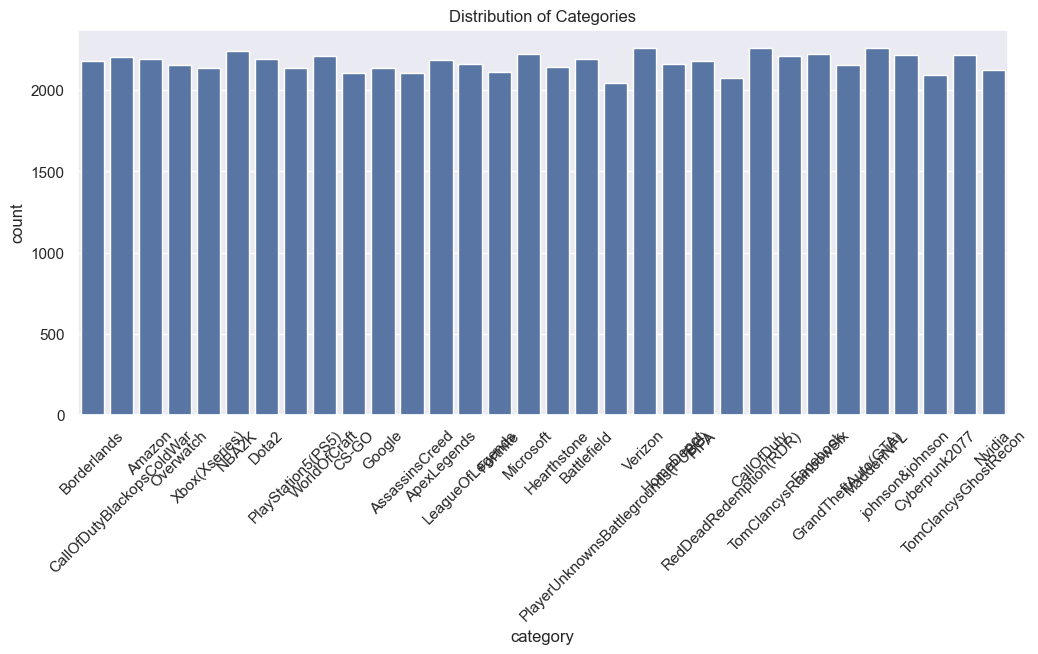

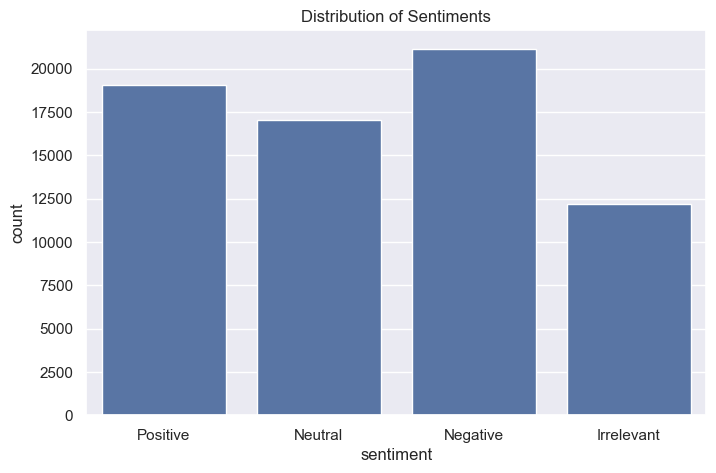


Category Distribution:
category
MaddenNFL                            3.25
CallOfDuty                           3.25
Verizon                              3.25
NBA2K                                3.23
Facebook                             3.20
Microsoft                            3.20
TomClancysGhostRecon                 3.19
johnson&johnson                      3.19
WorldOfCraft                         3.18
TomClancysRainbowSix                 3.18
CallOfDutyBlackopsColdWar            3.17
Amazon                               3.16
Dota2                                3.15
Battlefield                          3.15
ApexLegends                          3.15
Borderlands                          3.14
FIFA                                 3.13
LeagueOfLegends                      3.11
HomeDepot                            3.11
GrandTheftAuto(GTA)                  3.11
Overwatch                            3.10
Hearthstone                          3.09
Google                               3.08
X

In [10]:
# Plot category distribution
plt.figure(figsize=(12, 5))
sns.countplot(data=twitter_train, x='category')
plt.title('Distribution of Categories')
plt.xticks(rotation=45)
plt.show()

# Plot sentiment distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=twitter_train, x='sentiment')
plt.title('Distribution of Sentiments')
plt.show()

# Print distribution percentages
print("\nCategory Distribution:")
print(twitter_train['category'].value_counts(normalize=True).mul(100).round(2))

print("\nSentiment Distribution:")
print(twitter_train['sentiment'].value_counts(normalize=True).mul(100).round(2))

## 3. Text Analysis

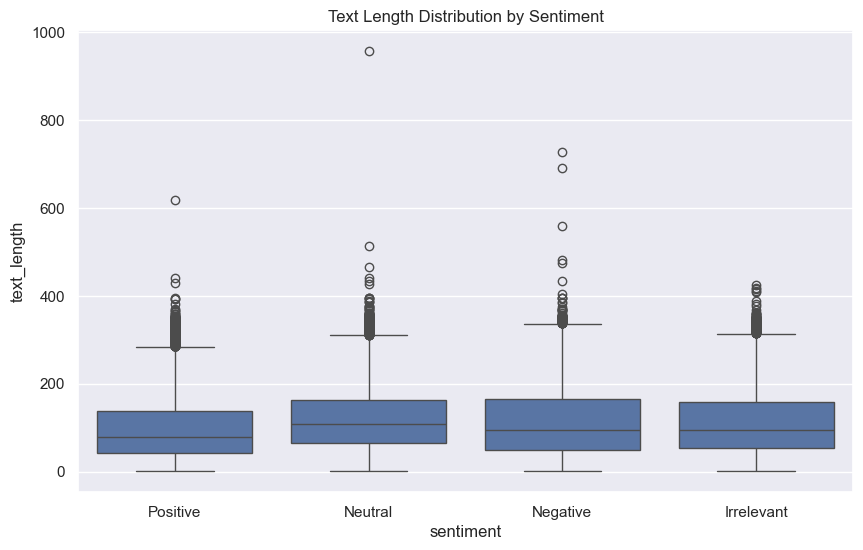


Text Length Statistics by Sentiment:
              count        mean        std  min   25%    50%    75%    max
sentiment                                                                 
Irrelevant  12216.0  113.847904  77.657149  1.0  54.0   95.0  158.0  426.0
Negative    21166.0  115.484267  80.891983  1.0  50.0   96.0  165.0  727.0
Neutral     17042.0  122.630266  75.464295  1.0  66.0  108.0  164.0  957.0
Positive    19067.0  100.749830  76.539684  1.0  42.0   80.0  139.0  619.0


In [11]:
# Add text length
twitter_train['text_length'] = twitter_train['text'].str.len()

# Text length distribution by sentiment
plt.figure(figsize=(10, 6))
sns.boxplot(data=twitter_train, x='sentiment', y='text_length')
plt.title('Text Length Distribution by Sentiment')
plt.show()

# Text length statistics
print("\nText Length Statistics by Sentiment:")
print(twitter_train.groupby('sentiment')['text_length'].describe())

## 4. Common Words Analysis

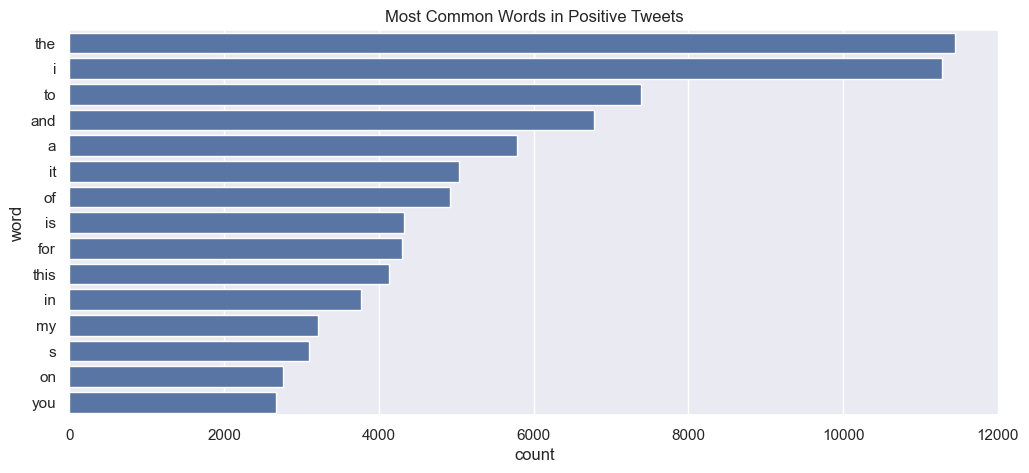

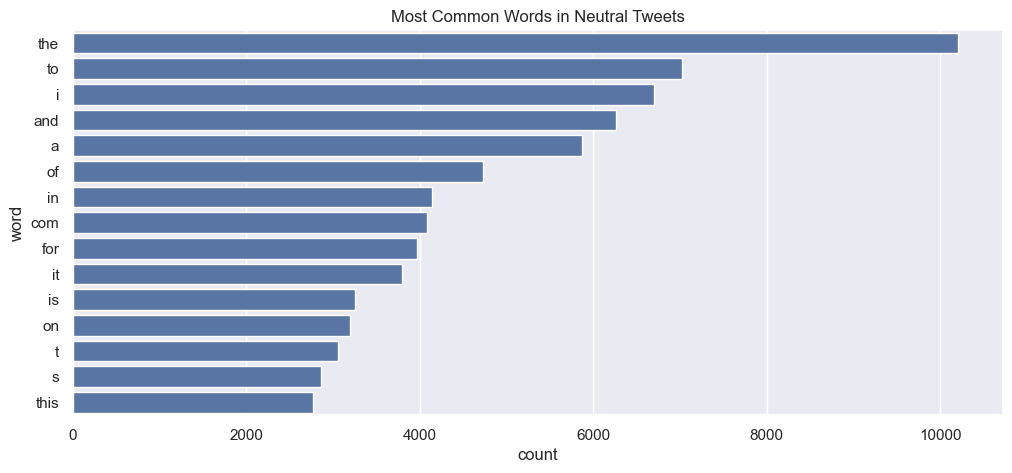

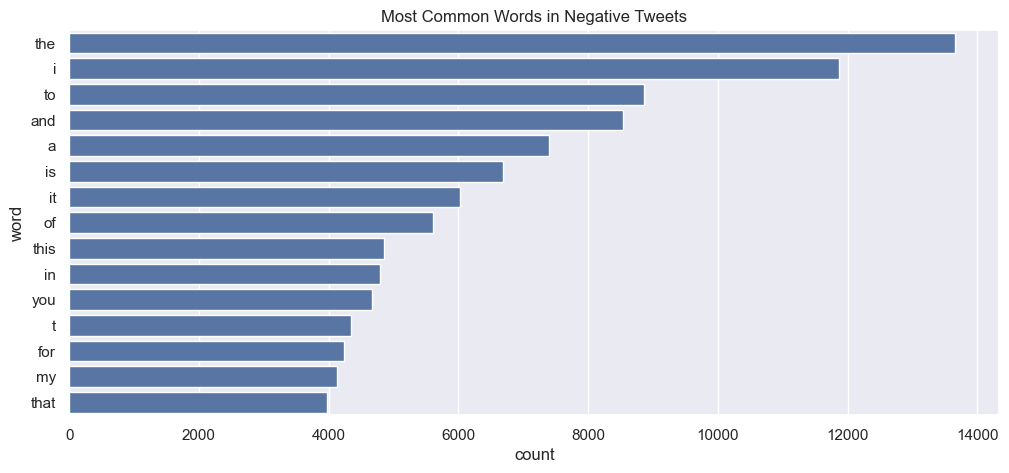

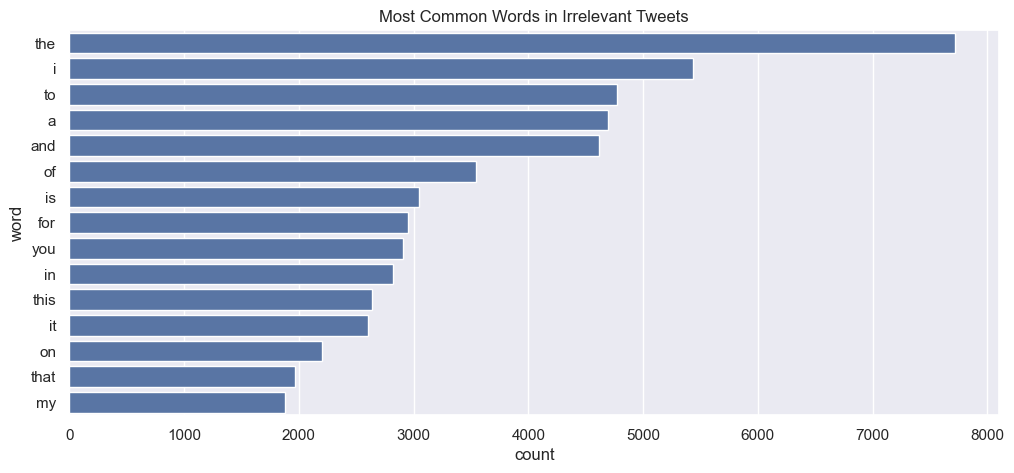

In [12]:
from collections import Counter
import re

def get_common_words(text_series, n=20):
    # Combine all text
    text = ' '.join(text_series.astype(str))
    # Convert to lowercase and split into words
    words = re.findall(r'\w+', text.lower())
    # Get most common words
    return Counter(words).most_common(n)

# Analyze common words by sentiment
for sentiment in twitter_train['sentiment'].unique():
    words = get_common_words(twitter_train[twitter_train['sentiment'] == sentiment]['text'])
    
    plt.figure(figsize=(12, 5))
    word_df = pd.DataFrame(words, columns=['word', 'count'])
    sns.barplot(data=word_df.head(15), x='count', y='word')
    plt.title(f'Most Common Words in {sentiment} Tweets')
    plt.show()

## 5. Category-Sentiment Relationship

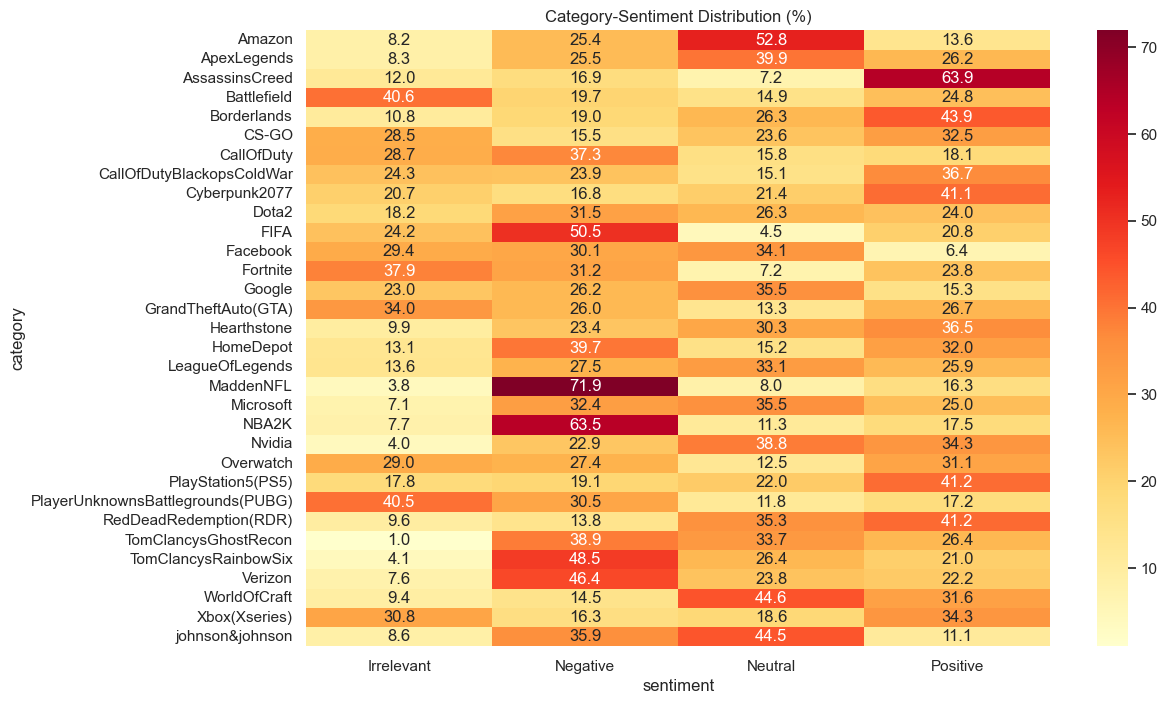

In [13]:
# Create a cross-tabulation of category and sentiment
category_sentiment = pd.crosstab(twitter_train['category'], twitter_train['sentiment'], normalize='index') * 100

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(category_sentiment, annot=True, fmt='.1f', cmap='YlOrRd')
plt.title('Category-Sentiment Distribution (%)')
plt.show()

In [14]:
twitter_train.head()

,id,category,sentiment,text,text_length
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,53
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,51
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,50
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,51
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,57


In [16]:
relevant_data = twitter_train[['text', 'sentiment']]

In [18]:
# Create the processed directory if it doesn't exist
import os
os.makedirs('../datasets/processed', exist_ok=True)

# Save as CSV
relevant_data.to_csv('../datasets/processed/twitter_relevant_data.csv', index=False)